#Projet 5 : Optimisez la gestion des données d'une boutique avec R ou Python


## Les données

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
erp = pd.read_excel("erp.xlsx")
liaison = pd.read_excel('liaison.xlsx')
web = pd.read_excel('web.xlsx')

/usr/local/lib/python3.8/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


## Préparation

### Dataframe Liaison

In [45]:
#renommer la colonne id_web en sku pour plus de transparence
liaison.rename(columns = {"id_web": "sku"}, inplace = True)

In [46]:
liaison.info

<bound method DataFrame.info of      product_id      sku
0          3847    15298
1          3849    15296
2          3850    15300
3          4032    19814
4          4039    19815
..          ...      ...
820        7203      NaN
821        7204      NaN
822        7247  13127-1
823        7329  14680-1
824        7338    16230

[825 rows x 2 columns]>

In [47]:
#Nombre de skus uniques
liaison['sku'].unique().shape

(735,)

In [48]:
#Nombre de product_id uniques
liaison['product_id'].unique().shape

(825,)

In [49]:
liaison[liaison['sku'].isna()]

,product_id,sku
19,4055,NaN
49,4090,NaN
50,4092,NaN
119,4195,NaN
131,4209,NaN
...,...,...
817,7196,NaN
818,7200,NaN
819,7201,NaN
820,7203,NaN


90 product_id n'ont pas de correspondance avec un numéro SKU dans le dataframe, a défaut de pouvoir trouver une correspondance on va supprimer ces product_id afin de ne pas avoir d'erreur dans nos calculs

In [50]:
liaison.dropna(inplace=True)

### Dataframe Web

In [51]:
web.head(2)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [52]:
#on regarde le nombre de sku uniques présent dans le DF
web['sku'].unique().shape

(715,)

In [53]:
#nombres de SKU en doublons dans le DF
web['sku'].duplicated().sum()

798

Le nombre de skus en doublons proviens de la colonne "post_type" qui comprends deux types d'entrées : "product" qui détermine les fiches produit et "attachement" qui détermine les urls des visuels des produits. Pour dédoublonner on va conserver uniquement l'entrée "product".

In [54]:
web = web.loc[web['post_type'] == 'product',:]

In [55]:
#nombres de SKU en doublons dans le DF après filtrage
web['sku'].duplicated().sum()

1

In [56]:
#on identifie la valeur qui reste en doublon
web[web['sku'].duplicated(keep=False)]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
470,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
471,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


Etant donné que les deux produits ne sont concernés par aucunes ventes on va simplement les supprimer du dataframe

In [57]:
web['sku'].dropna(inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


### Dataframe ERP

In [58]:
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [59]:
erp['product_id'].unique().shape

(825,)

In [60]:
erp.info

<bound method DataFrame.info of      product_id  onsale_web  price  stock_quantity stock_status
0          3847           1   24.2               0   outofstock
1          3849           1   34.3               0   outofstock
2          3850           1   20.8               0   outofstock
3          4032           1   14.1               0   outofstock
4          4039           1   46.0               0   outofstock
..          ...         ...    ...             ...          ...
820        7203           0   45.0              30      instock
821        7204           0   45.0               9      instock
822        7247           1   54.8              23      instock
823        7329           0   26.5              14      instock
824        7338           1   16.3              45      instock

[825 rows x 5 columns]>

###DataFrame fusionné

In [61]:
fusion1 = pd.merge(liaison, web, on='sku', how='inner')
dfGlobal = pd.merge(fusion1, erp, on='product_id', how='inner')
dfGlobal

,product_id,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,...,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,onsale_web,price,stock_quantity,stock_status
0,3847,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,...,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1,24.2,0,outofstock
1,3849,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,...,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1,34.3,0,outofstock
2,3850,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,...,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1,20.8,0,outofstock
3,4032,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,...,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1,14.1,0,outofstock
4,4039,19815,0,0,0,0.0,0.0,taxable,NaN,2.0,...,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1,46.0,0,outofstock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,6930,16135,0,0,0,0.0,5.0,taxable,NaN,2.0,...,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1,8.4,83,instock
710,7023,15891,0,0,0,0.0,0.0,taxable,NaN,2.0,...,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1,27.5,15,instock
711,7025,15887,0,0,0,0.0,0.0,taxable,NaN,2.0,...,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1,69.0,2,instock
712,7247,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,...,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1,54.8,23,instock


In [62]:
dfGlobal['sku'].unique().shape

(714,)

In [63]:
dfGlobal.info

<bound method DataFrame.info of      product_id      sku  virtual  downloadable  rating_count  average_rating  \
0          3847    15298        0             0             0             0.0   
1          3849    15296        0             0             0             0.0   
2          3850    15300        0             0             0             0.0   
3          4032    19814        0             0             0             0.0   
4          4039    19815        0             0             0             0.0   
..          ...      ...      ...           ...           ...             ...   
709        6930    16135        0             0             0             0.0   
710        7023    15891        0             0             0             0.0   
711        7025    15887        0             0             0             0.0   
712        7247  13127-1        0             0             0             0.0   
713        7338    16230        0             0             0             0.0

l'ensemble des skus présent dans la table web sont egalement présent dans la table liaison excepté le bon cadeau 25€

## Calcul du chiffre d'affaire par produits



In [64]:
#Ajout de la ligne CA au dataframe global
dfGlobal["Chiffre d'affaire"] = dfGlobal['total_sales'] * dfGlobal['price']
dfGlobal.head(2)

,product_id,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,...,guid,menu_order,post_type,post_mime_type,comment_count,onsale_web,price,stock_quantity,stock_status,Chiffre d'affaire
0,3847,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1,24.2,0,outofstock,145.2
1,3849,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1,34.3,0,outofstock,0.0


In [65]:
# module pour retrouver le CA par sku
sku = [15298,15296,15300]
dfGlobal.loc[dfGlobal['sku'].isin(sku), ['sku','product_id','total_sales','price',"Chiffre d'affaire"]]

,sku,product_id,total_sales,price,Chiffre d'affaire
0,15298,3847,6.0,24.2,145.2
1,15296,3849,0.0,34.3,0.0
2,15300,3850,0.0,20.8,0.0


In [66]:
dfGlobal[['sku','product_id','total_sales','price',"Chiffre d'affaire"]].sort_values(by="Chiffre d'affaire", ascending = False)

,sku,product_id,total_sales,price,Chiffre d'affaire
194,7818,4334,96.0,49.0,4704.0
71,1662,4144,87.0,49.0,4263.0
218,3510,4402,13.0,176.0,2288.0
70,11641,4142,30.0,53.0,1590.0
69,304,4141,40.0,39.0,1560.0
...,...,...,...,...,...
352,14599,4791,0.0,13.6,0.0
351,15732,4790,0.0,11.1,0.0
348,15881,4786,0.0,12.1,0.0
346,15734,4784,0.0,28.5,0.0


## Calcul du chiffre d'affaire global du e-commerce

In [67]:
#Calcul du CA global
globalCA = dfGlobal["Chiffre d'affaire"].sum()
print("le site a réalisé au global", globalCA,"€ de chiffre d'affaire")

le site a réalisé au global 70568.6 € de chiffre d'affaire


## Analyse des prix des produits

### Analyse Préliminaire

In [68]:
#on exclue toute erreur de saisie en regardant les prix les plus haut et les produits associés pour s'assurer qu'ils soient justifiés
dfGlobal.loc[:,['sku','post_name','price']].sort_values(by=['price'], ascending=False).head(5)

,sku,post_name,price
199,15940,champagne-egly-ouriet-grand-cru-millesime-2008,225.0
426,14581,david-duband-charmes-chambertin-grand-cru-2014,217.5
587,14983,coteaux-champenois-egly-ouriet-ambonnay-rouge-...,191.3
218,3510,cognac-frapin-vip-xo,176.0
553,15185,camille-giroud-clos-de-vougeot-2016,175.0


In [69]:
#on exclue toute erreur de saisie en regardant les prix les plus bas afin de s'assurer de n'avoir aucun produit à 0€ ou des valeurs negatives
dfGlobal.loc[:,['sku','post_name','price']].sort_values(by=['price'], ascending=True).head(5)

,sku,post_name,price
645,14570,moulin-de-gassac-igp-pays-dherault-guilhem-bla...,5.2
98,16211,maurel-pays-doc-chenin-colombard-2019,5.7
560,14338,maurel-pays-d-oc-cabernet-sauvignon-2017,5.7
97,16210,maurel-pays-oc-chardonnay-2019,5.7
99,16209,maurel-cabardes-tradition-2017,5.7


In [70]:
dfGlobal['price'].isnull().values.any()

False

### Analyse statistique de la variable PRICE pour détecter les valeurs aberrantes

#### Discrimination de la série

In [71]:
# on séléctionne la série de données à analyser
prix = dfGlobal['price']

# On calcule ensuite la moyenne, l'écart type, la médiane et les quartiles de cette série
moyenne = np.mean(prix)
ecart_type = np.std(prix)
Q1 = np.quantile(prix,0.25)
mediane = np.quantile(prix,0.5)
Q3 = np.quantile(prix,0.75)

print("Le prix moyen est de", round(moyenne,2),"€")
print("L'ecart type est de",round(ecart_type,2),"€")
print("Le premier quartile est à", round(Q1,2),"€")
print("La médiane est à",round(mediane,2),"€")
print("Le troisième quartile est à", round(Q3,2),"€")

Le prix moyen est de 32.49 €
L'ecart type est de 27.79 €
Le premier quartile est à 14.1 €
La médiane est à 23.55 €
Le troisième quartile est à 42.18 €


#### Calcul des valeurs aberrantes via l'écart type

In [72]:
# Définir une limite pour détecter les valeurs aberrantes (ici 1,5 fois l'écart-type au-dessus de la moyenne)
limite_sup = moyenne + 1.5 * ecart_type
limite_inf = moyenne - 1.5 * ecart_type

print("la limite supérieur est à",round(limite_sup,2),"€")
print("la limite inférieur est à",round(limite_inf,2),"€")

la limite supérieur est à 74.18 €
la limite inférieur est à -9.19 €


In [73]:
# Trouver les valeurs aberrantes dans la série
typ_outliers_sup = prix[prix > limite_sup]
typ_outliers_inf = prix[prix < limite_inf]

#print(typ_outliers_sup)
len(typ_outliers_sup)
#print(typ_outliers_inf)

49

In [74]:
valAberrantesTyp = dfGlobal.loc[dfGlobal['price'] > 74.18, ['sku','product_id','post_name','total_sales','price',"Chiffre d'affaire"]]
valAberrantesTyp.sort_values(by=['price'], ascending=False)

,sku,product_id,post_name,total_sales,price,Chiffre d'affaire
199,15940,4352,champagne-egly-ouriet-grand-cru-millesime-2008,5.0,225.0,1125.0
426,14581,5001,david-duband-charmes-chambertin-grand-cru-2014,0.0,217.5,0.0
587,14983,5892,coteaux-champenois-egly-ouriet-ambonnay-rouge-...,3.0,191.3,573.9
218,3510,4402,cognac-frapin-vip-xo,13.0,176.0,2288.0
553,15185,5767,camille-giroud-clos-de-vougeot-2016,0.0,175.0,0.0
221,7819,4406,cognac-frapin-chateau-de-fontpinot-1989-20-ans,0.0,157.0,0.0
381,14220,4904,domaine-des-croix-corton-charlemagne-grand-cru...,5.0,137.0,685.0
642,14923,6126,champagne-gosset-celebris-vintage-2007,2.0,135.0,270.0
201,12589,4355,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,11.0,126.5,1391.5
511,14915,5612,domaine-weinbach-gewurztraminer-gc-furstentum-...,0.0,124.8,0.0


 #### Calcul des valeurs aberrantes via l'écart interquartiles

In [75]:
#Identification des valeurs aberrantes avec la règle 1,5 x écart interquartile

borne_inf = Q1 - 1.5 * (Q3 -Q1)
borne_sup = Q3 + 1.5 * (Q3 -Q1)

print("la borne supérieur est à",round(borne_sup,2),"€")
print("la borne inférieur est à",round(borne_inf,2),"€")

la borne supérieur est à 84.29 €
la borne inférieur est à -28.01 €


In [76]:
itq_outliers_sup = prix[prix > borne_sup]
itq_outliers_inf = prix[prix < borne_inf]

#print(itq_outliers_sup)
len(itq_outliers_sup)
#print(itq_outliers_inf)

32

In [77]:
valAberrantesItq = dfGlobal.loc[dfGlobal['price'] > 84.29, ['sku','product_id','post_name','total_sales','price',"Chiffre d'affaire"]]
valAberrantesItq.sort_values(by=['price'], ascending=False)

,sku,product_id,post_name,total_sales,price,Chiffre d'affaire
199,15940,4352,champagne-egly-ouriet-grand-cru-millesime-2008,5.0,225.0,1125.0
426,14581,5001,david-duband-charmes-chambertin-grand-cru-2014,0.0,217.5,0.0
587,14983,5892,coteaux-champenois-egly-ouriet-ambonnay-rouge-...,3.0,191.3,573.9
218,3510,4402,cognac-frapin-vip-xo,13.0,176.0,2288.0
553,15185,5767,camille-giroud-clos-de-vougeot-2016,0.0,175.0,0.0
221,7819,4406,cognac-frapin-chateau-de-fontpinot-1989-20-ans,0.0,157.0,0.0
381,14220,4904,domaine-des-croix-corton-charlemagne-grand-cru...,5.0,137.0,685.0
642,14923,6126,champagne-gosset-celebris-vintage-2007,2.0,135.0,270.0
201,12589,4355,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,11.0,126.5,1391.5
511,14915,5612,domaine-weinbach-gewurztraminer-gc-furstentum-...,0.0,124.8,0.0


#### Représentations graphiques

**Bar plot**

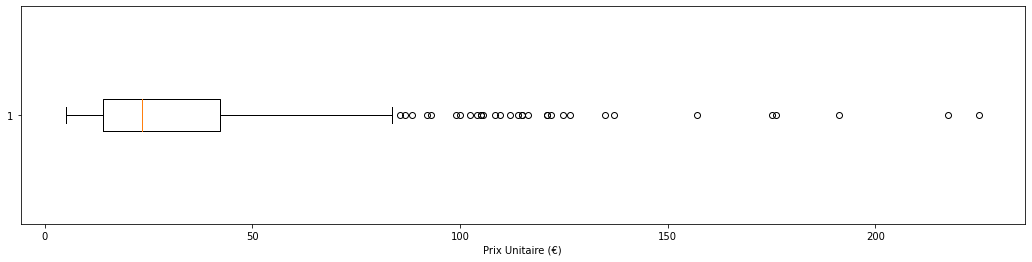

In [78]:
plt.figure(figsize=(18,4))
plt.boxplot(prix, vert=False)
plt.xlabel("Prix Unitaire (€)")
plt.show()

**Nuage de points**

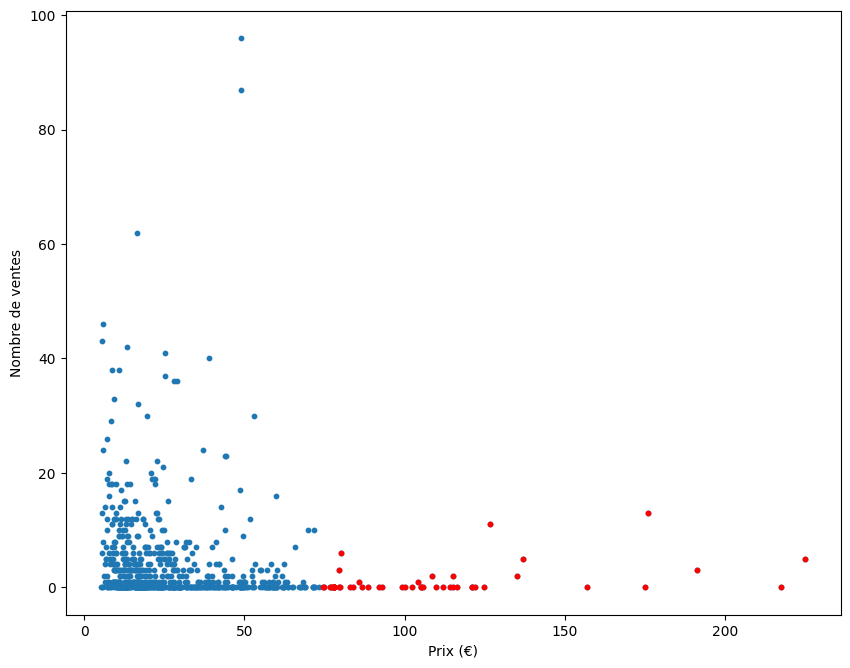

In [79]:
# Définir un seuil pour identifier les valeurs aberrantes 
limite_sup

# Initialiser le graphique avec tous les points 
plt.figure(figsize=(10,8), dpi=100)
plt.scatter(dfGlobal['price'], dfGlobal['total_sales'], s=10)

# Initialiser une liste vides pour les valeurs aberrantes
x_outliers = []
y_outliers = []

# Ajouter les valeurs aberrants à cette liste
for x, y in zip(dfGlobal['price'], dfGlobal['total_sales']):
    if x > limite_sup:
        x_outliers.append(x)
        y_outliers.append(y)

# Afficher les points aberrants en rouge sur le nuage de point
plt.scatter(x_outliers, y_outliers, color='red', s=10)
plt.ylabel('Nombre de ventes')
plt.xlabel('Prix (€)')
plt.show()